# Texas Licenses

We originall got our dataset from the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation, but they've changed around since then! I'm pretty sure it's [this dataset](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but we'll just use a local version instead of the most current.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

np.nan

nan

## 1. Open the file

We'll start with `licfile.csv`, which is a list of licenses.

In [2]:
df = pd.read_csv("licfile.csv")
df.head()

/Users/elenacox/.pyenv/versions/3.7.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,08102017,"RISINGER, JIM MARVIN.1",7668 S US HWY 59,Unnamed: 11,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,Unnamed: 17,N
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, but setting your own column names**. Their [current data dictionary might not perfectly match](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but you can use it to understand what the columns are. For the dataset we're using, the order goes like this:

* LICTYPE
* LICNUMBER
* BIZCOUNTY
* BIZNAME
* BIZLINE1
* BIZLINE2
* BIZCITYSTATE
* BIZTELEPHONE
* EXPIRATION
* OWNER
* MAILLINE1
* MAILLINE2
* MAILCITYSTATE
* MAILCOUNTYCODE
* MAILCOUNTY
* MAILZIP
* TELEPHONE
* LICSUBTYPE
* CEFLAG

**Note:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

In [3]:
df.columns = ['LICTYPE', 'LICNUMBER', 'BIZCOUNTY', 'BIZNAME', 'BIZLINE1', 'BIZLINE2', 'BIZCITYSTATE',\
              'BIZTELEPHONE', 'EXPIRATION', 'OWNER', 'MAILLINE1', 'MAILLINE2', 'MAILCITYSTATE', 'MAILCOUNTYCODE',\
              'MAILCOUNTY', 'MAILZIP', 'TELEPHONE', 'LICSUBTYPE', 'CEFLAG']

In [4]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [5]:
dtype={"MAILCOUNTYCODE": str, "EXPIRATION": str}

Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

In [6]:
df.dtypes

LICTYPE            object
LICNUMBER          object
BIZCOUNTY          object
BIZNAME            object
BIZLINE1          float64
BIZLINE2          float64
BIZCITYSTATE      float64
BIZTELEPHONE      float64
EXPIRATION          int64
OWNER              object
MAILLINE1          object
MAILLINE2          object
MAILCITYSTATE      object
MAILCOUNTYCODE    float64
MAILCOUNTY         object
MAILZIP            object
TELEPHONE          object
LICSUBTYPE         object
CEFLAG             object
dtype: object

## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

List slicing forever! It's the thing with the `[]`. There are like five ways to do this one.

Check the first five expirations to make sure they look right.

# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [7]:
df.LICTYPE.value_counts().head(10)

Cosmetology Operator        151206
Apprentice Electrician      110593
Cosmetology Manicurist       49563
Journeyman Electrician       38170
A/C Technician               27959
Cosmetology Esthetician      23613
Cosmetology Beauty Salon     23577
Master Electrician           16810
A/C Contractor               16376
Barber, Class A              16019
Name: LICTYPE, dtype: int64

## 6. What are the top 10 least common?

In [8]:
df.LICTYPE.value_counts().tail(10)

Registered Accessibility Specialist CE Provider    8
Mobile Cosmetology Esthetician Specialty Saloon    5
Barber Hair Weaving Shop                           4
Barber Hair Braiding Shop                          4
Booting CE Provider                                3
Licensed Court Interpreter CE Provider             2
Mobile Cosmetology Manicure Specialty Saloon       2
Cosmetology Wig Instructor                         2
Mobile Cosmetology Esthetician/Manicure Saloon     2
Legal Service Contract Admin                       1
Name: LICTYPE, dtype: int64

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [9]:
# Yes I know I left this in here, it's a learning experience!
df[df['LICTYPE'].str.contains("Electrician", na=False)]

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
47024,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",NaN,NaN,NaN,NaN,5272017,"BOLTON, MARION N",2262 HARBOR BOLTON RD,NaN,FRANKLIN TX 77856-5367,395.0,ROBERTSON,77856,9798284713,AE,N
47025,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",NaN,NaN,NaN,NaN,10212017,"GONZALEZ, FELIX G JR",8507 TIMBER BELT,NaN,SAN ANTONIO TX 78250-4478,29.0,BEXAR,78250,2104887491,AE,N
47026,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",NaN,NaN,NaN,NaN,5282017,"HERNANDEZ, RUFINO",1719 ROBINHOOD ST,NaN,PASADENA TX 77502-2218,201.0,HARRIS,77502,7133824802,AE,N
47027,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",NaN,NaN,NaN,NaN,6182016,"COPELAND, MARCUS A",201 N MADISON AVE,NaN,MOUNT PLEASANT TX 75455-3944,449.0,TITUS,75455,9035634950,AE,N
47028,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",NaN,NaN,NaN,NaN,10262016,"ANGLIN, DAVID LEE",8066 FM 1001,NaN,COOKVILLE TX 75558-3064,449.0,TITUS,75558,9039462547,AE,N
47029,Apprentice Electrician,32428,HARRIS,"VALLEJO, ARMANDO E",NaN,NaN,NaN,NaN,10212016,"VALLEJO, ARMANDO E",3903 ERBY ST TRLR 88,NaN,HOUSTON TX 77087-1250,201.0,HARRIS,77087,8325285241,AE,N
47030,Apprentice Electrician,32440,TRAVIS,"RODRIGUEZ, REYNALDO",NaN,NaN,NaN,NaN,12142017,"RODRIGUEZ, REYNALDO",10905 SHAWN LEE CV,NaN,AUSTIN TX 78753-3363,453.0,TRAVIS,78753,7372474738,AE,N
47031,Apprentice Electrician,32442,CASS,"TERRY, ALAN D JR",NaN,NaN,NaN,NaN,6032017,"TERRY, ALAN D JR",605 KEASLER,NaN,HUGHES SPRINGS TX 75656-2575,67.0,CASS,75656,9036392017,AE,N
47032,Apprentice Electrician,32450,HARRIS,"TREVINO, ADIEL A",NaN,NaN,NaN,NaN,6112017,"TREVINO, ADIEL A",3824 LYDIA ST,NaN,HOUSTON TX 77021-6125,201.0,HARRIS,77021,7134406945,AE,N
47033,Apprentice Electrician,32453,GALVESTON,"ROACHELL, LAWRENCE S",NaN,NaN,NaN,NaN,11172017,"ROACHELL, LAWRENCE S",115 LAUREL MEADOW CT,NaN,LA MARQUE TX 77568-2497,167.0,GALVESTON,77568,4095390843,AE,N


## 8. How many of the rows of LICTYPE are NaN?

In [10]:
df.LICTYPE.isnull().value_counts()

False    590729
True       7086
Name: LICTYPE, dtype: int64

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

In [11]:
df.LICTYPE = df.LICTYPE.fillna(False)

This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

## 10. What's the most popular kind of electrician?

In [12]:
#df[df.LICTYPE.str.contains("Electrician")].value_counts(na=False)
electricians= df[df.LICTYPE.str.contains("Electrician",na=False)]
electricians.LICTYPE.value_counts()


Apprentice Electrician                110593
Journeyman Electrician                 38170
Master Electrician                     16810
Apprentice Sign Electrician             3994
Maintenance Electrician                 1184
Master Sign Electrician                  542
Journeyman Sign Electrician              391
Electrician CE Provider                  109
Electrician Apprenticeship Program        45
Name: LICTYPE, dtype: int64

## 11. Graph it, with the largest bar on top.

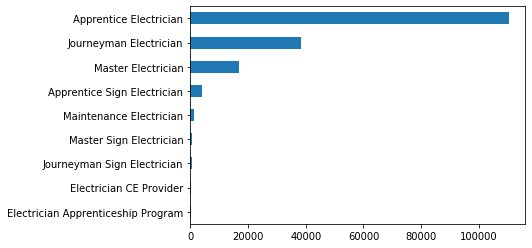

In [13]:
electrician_type = electricians.LICTYPE.value_counts().sort_values(ascending=True)
electrician_type.plot(kind='barh')

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [14]:
sign_electricians= df[df.LICTYPE.str.contains("Sign Electrician",na=False)]
sign_electricians.LICTYPE.describe()

count                            4927
unique                              3
top       Apprentice Sign Electrician
freq                             3994
Name: LICTYPE, dtype: object

# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before (in a few different ways!).

* **Hint:** If you get an error about missing or `NaN` data, you might use `.fillna('')` to replace every empty owner name with an empty string. This might not happen to you, though, depending on how you do it!

* **Hint:** You probably want to do `expand=False` on your extraction to make sure it comes out as a series instead of a dataframe.

In [15]:
df["BIZNAME"] = df["BIZNAME"].fillna('')



## 14. Save the last name into a new column

Then check to make sure it exists, and you successfully saved it into the dataframe.

In [39]:
splitted = df['BIZNAME'].str.split()
df['FIRSTNAME'] = splitted.str[1]
df['LASTNAME'] = splitted.str[0]
df['MIDDLENAME'] = splitted.str[-1]

In [17]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,first_name,last_name,middle_name
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",...,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N,JON,"WILLIAMS,",ANDRE
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",...,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N,JUAN,"GUEVARA,",ANTONIO
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",...,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N,JAMES,"BOWERS,",II
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",...,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N,JOHN,"DEMSKY,",EDWARD
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",...,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N,RANDY,"THOMPSON,",D


# 15. What are the ten most popular last names?

In [40]:
df.LASTNAME.value_counts().head(10)

NGUYEN,       22321
TRAN,          8153
GARCIA,        5685
LE,            5605
MARTINEZ,      4809
RODRIGUEZ,     4721
HERNANDEZ,     4469
PHAM,          3993
GONZALEZ,      3692
SMITH,         3351
Name: LASTNAME, dtype: int64

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [41]:
df[df.LASTNAME.str.contains("NGUYEN",na=False)]['LICTYPE'].value_counts().head()

Cosmetology Manicurist     12911
Cosmetology Operator        4062
Cosmetology Esthetician     2897
Cosmetologist               1881
Apprentice Electrician       197
Name: LICTYPE, dtype: int64

In [42]:
df[df.LASTNAME.str.contains("TRAN",na=False)]['LICTYPE'].value_counts().head()

Cosmetology Manicurist     4753
Cosmetology Operator       1599
Cosmetology Esthetician    1055
Cosmetologist               726
Apprentice Electrician      192
Name: LICTYPE, dtype: int64

In [43]:
df[df.LASTNAME.str.contains("LE",na=False)]['LICTYPE'].value_counts().head()

Cosmetology Operator      12485
Apprentice Electrician     8918
Cosmetology Manicurist     4005
Journeyman Electrician     3141
A/C Technician             2209
Name: LICTYPE, dtype: int64

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

## 18. Most popular licenses for Garcia? Rodriguez? Martinez?

Those are the 3 most common last names for self-identifying Hispanics in the USA.

In [44]:
df[df.LASTNAME.str.contains("GARCIA",na=False)]['LICTYPE'].value_counts().head()

Apprentice Electrician    2176
Cosmetology Operator      1885
Journeyman Electrician     499
A/C Technician             356
Barber, Class A            200
Name: LICTYPE, dtype: int64

In [45]:
df[df.LASTNAME.str.contains("RODRIGUEZ",na=False)]['LICTYPE'].value_counts().head()

Apprentice Electrician    1744
Cosmetology Operator      1526
Journeyman Electrician     388
A/C Technician             343
Barber, Class A            147
Name: LICTYPE, dtype: int64

In [46]:
df[df.LASTNAME.str.contains("MARTINEZ",na=False)]['LICTYPE'].value_counts().head()

Apprentice Electrician    1795
Cosmetology Operator      1558
Journeyman Electrician     394
A/C Technician             337
Barber, Class A            158
Name: LICTYPE, dtype: int64

## 19. Most popular license for anyone with a last name that ENDS in `-ez`

The answer is not `.str.contains('ez')`, but it isn't necessarily too different. **Make sure your numbers match mine.**

One way involves a `.str.` method that check if a string ends with something, the other way involves a regular expression that has a "end of the string" marker (similar to how we've used `^` for the start of a string before). If you're thinking about the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [47]:
df[df.LASTNAME.str.contains("EZ$",na=False)]['LICTYPE'].value_counts().head()

Apprentice Electrician         1208
Cosmetology Operator            573
A/C Technician                  145
Apprentice Sign Electrician      59
Electrical Contractor            57
Name: LICTYPE, dtype: int64

## 20. Get that as a percentage

In [48]:
df[df.LASTNAME.str.contains("EZ$",na=False)]['LICTYPE'].value_counts(normalize=True).head()*100

Apprentice Electrician         50.649895
Cosmetology Operator           24.025157
A/C Technician                  6.079665
Apprentice Sign Electrician     2.473795
Electrical Contractor           2.389937
Name: LICTYPE, dtype: float64

# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [ ]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

In [ ]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

In [ ]:
# Save it into a new column
sample_df['age'] = sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)
sample_df.head()

**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

In [ ]:
df['OWNER'].head(10)

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [54]:
df.FIRSTNAME.isnull().value_counts()

False    595443
True       2372
Name: FIRSTNAME, dtype: int64

What do their names look like?

In [55]:
df[df.FIRSTNAME.isnull()].head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,first_name,last_name,middle_name,FIRSTNAME,LASTNAME,MIDDLENAME
28157,Appliance Installation Contractor,311,COLLIN,AQUATEX,NaN,NaN,NaN,NaN,8272017,AQUATEX,...,75491,2149144928,RAIC,N,NaN,AQUATEX,AQUATEX,NaN,AQUATEX,AQUATEX
28470,Appliance Installation Contractor,694,COLLIN,POOLTEX,NaN,NaN,NaN,NaN,9292017,POOLTEX,...,75023,9724222652,RAIC,N,NaN,POOLTEX,POOLTEX,NaN,POOLTEX,POOLTEX
28509,Appliance Installation Contractor,738,KAUFMAN,ELITEPOOLREPAIR.COM,NaN,NaN,NaN,NaN,8182017,ELITEPOOLREPAIR.COM,...,75143,2145512542,RAIC,N,NaN,ELITEPOOLREPAIR.COM,ELITEPOOLREPAIR.COM,NaN,ELITEPOOLREPAIR.COM,ELITEPOOLREPAIR.COM
28539,Appliance Installation Contractor,770,WILLIAMSON,SOSERVICES,NaN,NaN,NaN,NaN,10082017,SOSERVICES,...,78641,5129448141,RAIC,N,NaN,SOSERVICES,SOSERVICES,NaN,SOSERVICES,SOSERVICES
28596,Appliance Installation Contractor,827,GALVESTON,GLACIER,NaN,NaN,NaN,NaN,7022017,GLACIER,...,77573,2813322322,RAIC,N,NaN,GLACIER,GLACIER,NaN,GLACIER,GLACIER


## 24. If it's a problem, you can fix it (if you'd like!)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use code like this:

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people where `FIRSTNAME` is null.

How many empty first names do we have now?

My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [56]:
df.FIRSTNAME.value_counts().head(10)

JOSE       7436
MICHAEL    6289
DAVID      5742
JAMES      5437
NAILS      5024
MARIA      5003
ROBERT     4781
HAIR       4742
JOHN       4707
JUAN       4349
Name: FIRSTNAME, dtype: int64

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and okay honestly anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [61]:
df[df.LICTYPE.str.contains("Cosmetolog",na=False)]['FIRSTNAME'].value_counts().head()

SyntaxError: invalid syntax (<ipython-input-61-bf4192612731>, line 1)

## 27. Most popular first names for anything involving electricity?

## 28. Can we be any more obnoxious in this assignment?

Not only are we going to detect gender from first names, but we're also going to use a library that has the terrible name of [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again. Apparently Python didn't get the message.

Except actually sexmachine doesn't work on Python 3 because it's from 300 BC so we're going to use a Python 3 fork called [gender guesser](https://pypi.python.org/pypi/gender-guesser/) (hooray!).

#### Use `pip` or `pip3` to install gender-guesser.

In [ ]:
!pip install gender-guesser

#### Test to see that it works

In [ ]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

In [ ]:
detector.get_gender('Jose')

In [ ]:
detector.get_gender('Maria')

#### Use it on a dataframe

To use something fancy like that on a dataframe, you use `.apply`. Check it out: 

In [ ]:
df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name)).head()

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

## 30. We like taking risks - get rid of ambiguity

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [ ]:
import numpy as np



## 31. Do men or women have more licenses? What is the percentage of unknown genders?

## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

## 31. What are the most popular licenses for men? For women?

## 32. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values.

(By the way, what are those tow truck jobs?)

## 33. Graph them!

And let's **give them titles** so we know which is which.

## 34. Calcuate the gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [ ]:
# So when you do .value_counts(), it gives you an index and a value
df[df['GENDER'] == 'male'].LICTYPE.value_counts().head()

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [ ]:
# All of the values_counts() we will be combining
vc_series = [
    df[df['GENDER'] == 'male'].LICTYPE.value_counts(),
    df[df['GENDER'] == 'female'].LICTYPE.value_counts(),
    df[df['GENDER'].isnull()].LICTYPE.value_counts()
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

In [ ]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

In [ ]:
# Rename the columns appropriately
gender_df.columns = ["license", "male", "female", "unknown"]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

## 35. What 10 licenses with more than 2,000 people and over 75% known has the most male owners? The most female?

## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

### 38. Combine with your original licenses dataset dataframe to get phone numbers and addresses for each violation. Check that it is 90 rows, 28 columns.

## 39. Find each violation involving a failure with records. Use a regular expression.

## 40. How much money was each fine? Use a regular expression and .str.extract (we talked about it before!)

Unfortunately large and helpful troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

## 41. Clean those results (no commas, no dollar signs, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

`.astype(int)` will convert it into an integer for you.

## 42. Which orders results in the top fines?

## 43. Are you still here???

I'm sure impressed.